In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pickle
from pathlib import Path
import pandas as pd

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set up the notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

print("Libraries loaded successfully!")


Libraries loaded successfully!


In [8]:
# Specify the experiment run name
RUN_NAME = "patches_experiment_full_1"

# Load experiment results
experiment_dir = Path(f"runs/{RUN_NAME}")
results_path = experiment_dir / "experiment_results.pkl"
json_path = experiment_dir / "experiment_results.json"

print(f"Looking for results in: {experiment_dir}")

# Load the results
if results_path.exists():
    with open(results_path, 'rb') as f:
        results = pickle.load(f)
    print("✓ Loaded results from pickle file")
elif json_path.exists():
    with open(json_path, 'r') as f:
        results = json.load(f)
    print("✓ Loaded results from JSON file")
else:
    raise FileNotFoundError(f"No results found in {experiment_dir}")

print(f"Number of runs: {len(results['runs'])}")
print(f"Batch size: {results['experiment_config']['batch_size']}")
print(f"Iterations: {results['experiment_config']['iterations']}")


Looking for results in: runs/patches_experiment_full_1
✓ Loaded results from pickle file
Number of runs: 5
Batch size: 6144
Iterations: 300000


In [9]:
# Extract metrics from all runs
linear_scores = []
perm_scores = []
angle_errors = []
losses = []

for run_data in results['runs']:
    scores = run_data['scores']
    linear_scores.append(scores['linear_scores'])
    perm_scores.append(scores['perm_scores'])
    angle_errors.append(scores['angle_preservation_errors'])
    
    # Extract losses if available
    if 'eval_losses' in scores:
        losses.append(scores['eval_losses'])
    elif 'loss' in scores:
        losses.append(scores['loss'])

# Convert to numpy arrays
linear_scores = np.array(linear_scores)
perm_scores = np.array(perm_scores)
angle_errors = np.array(angle_errors)

if losses:
    losses = np.array(losses)
    print(f"✓ Loaded losses: shape {losses.shape}")
else:
    print("⚠ No loss data found")

print(f"✓ Linear scores: shape {linear_scores.shape}")
print(f"✓ Permutation scores: shape {perm_scores.shape}")
print(f"✓ Angle errors: shape {angle_errors.shape}")

# Create iteration axis
iterations = np.arange(linear_scores.shape[1])
print(f"Training iterations: {len(iterations)}")


✓ Loaded losses: shape (5, 15000)
✓ Linear scores: shape (5, 15000)
✓ Permutation scores: shape (5, 15000)
✓ Angle errors: shape (5, 15000)
Training iterations: 15000


7.83370304107666
8.074788093566895
7.834875106811523
7.843898773193359
7.83785343170166


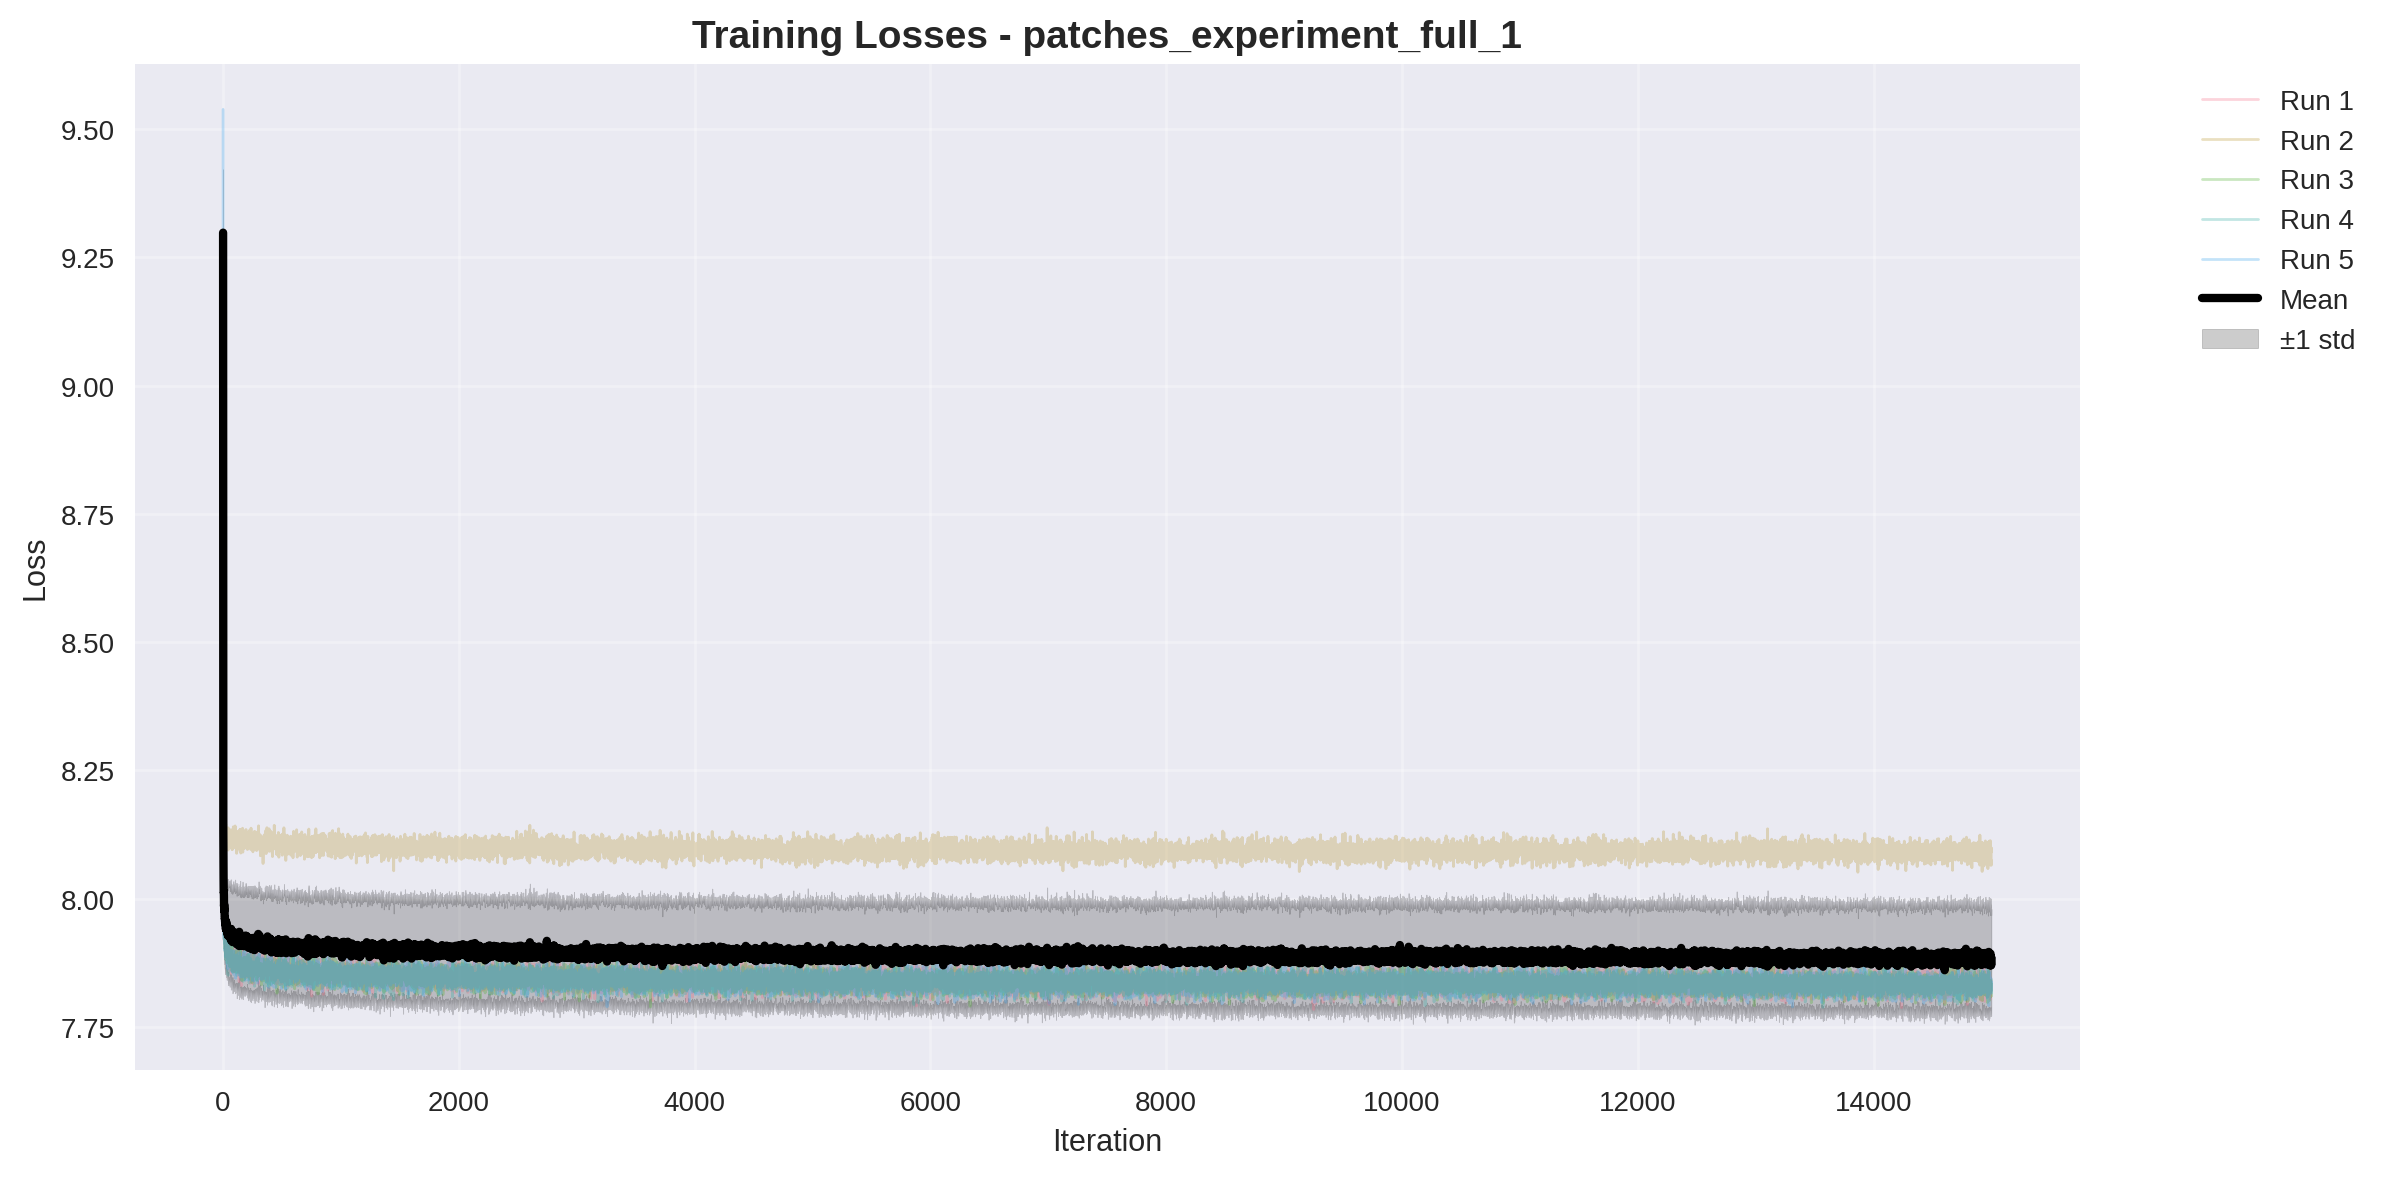

Final loss (mean ± std): 7.8850 ± 0.0949


In [13]:
if losses.size > 0:
    plt.figure(figsize=(12, 6))
    
    # Plot individual runs
    for i, loss_curve in enumerate(losses):
        print(loss_curve[-1])
        plt.plot(iterations, loss_curve, alpha=0.3, linewidth=1, label=f'Run {i+1}')
    
    # Plot mean and std
    mean_loss = np.mean(losses, axis=0)
    std_loss = np.std(losses, axis=0)
    plt.plot(iterations, mean_loss, 'k-', linewidth=3, label='Mean')
    plt.fill_between(iterations, mean_loss - std_loss, mean_loss + std_loss, 
                     alpha=0.2, color='black', label='±1 std')
    
    plt.title(f'Training Losses - {RUN_NAME}', fontsize=14, fontweight='bold')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"Final loss (mean ± std): {mean_loss[-1]:.4f} ± {std_loss[-1]:.4f}")
else:
    print("No loss data available to plot")


0.9926511645317078
0.6632349491119385
0.9936100840568542
0.9945552349090576
0.9940516352653503


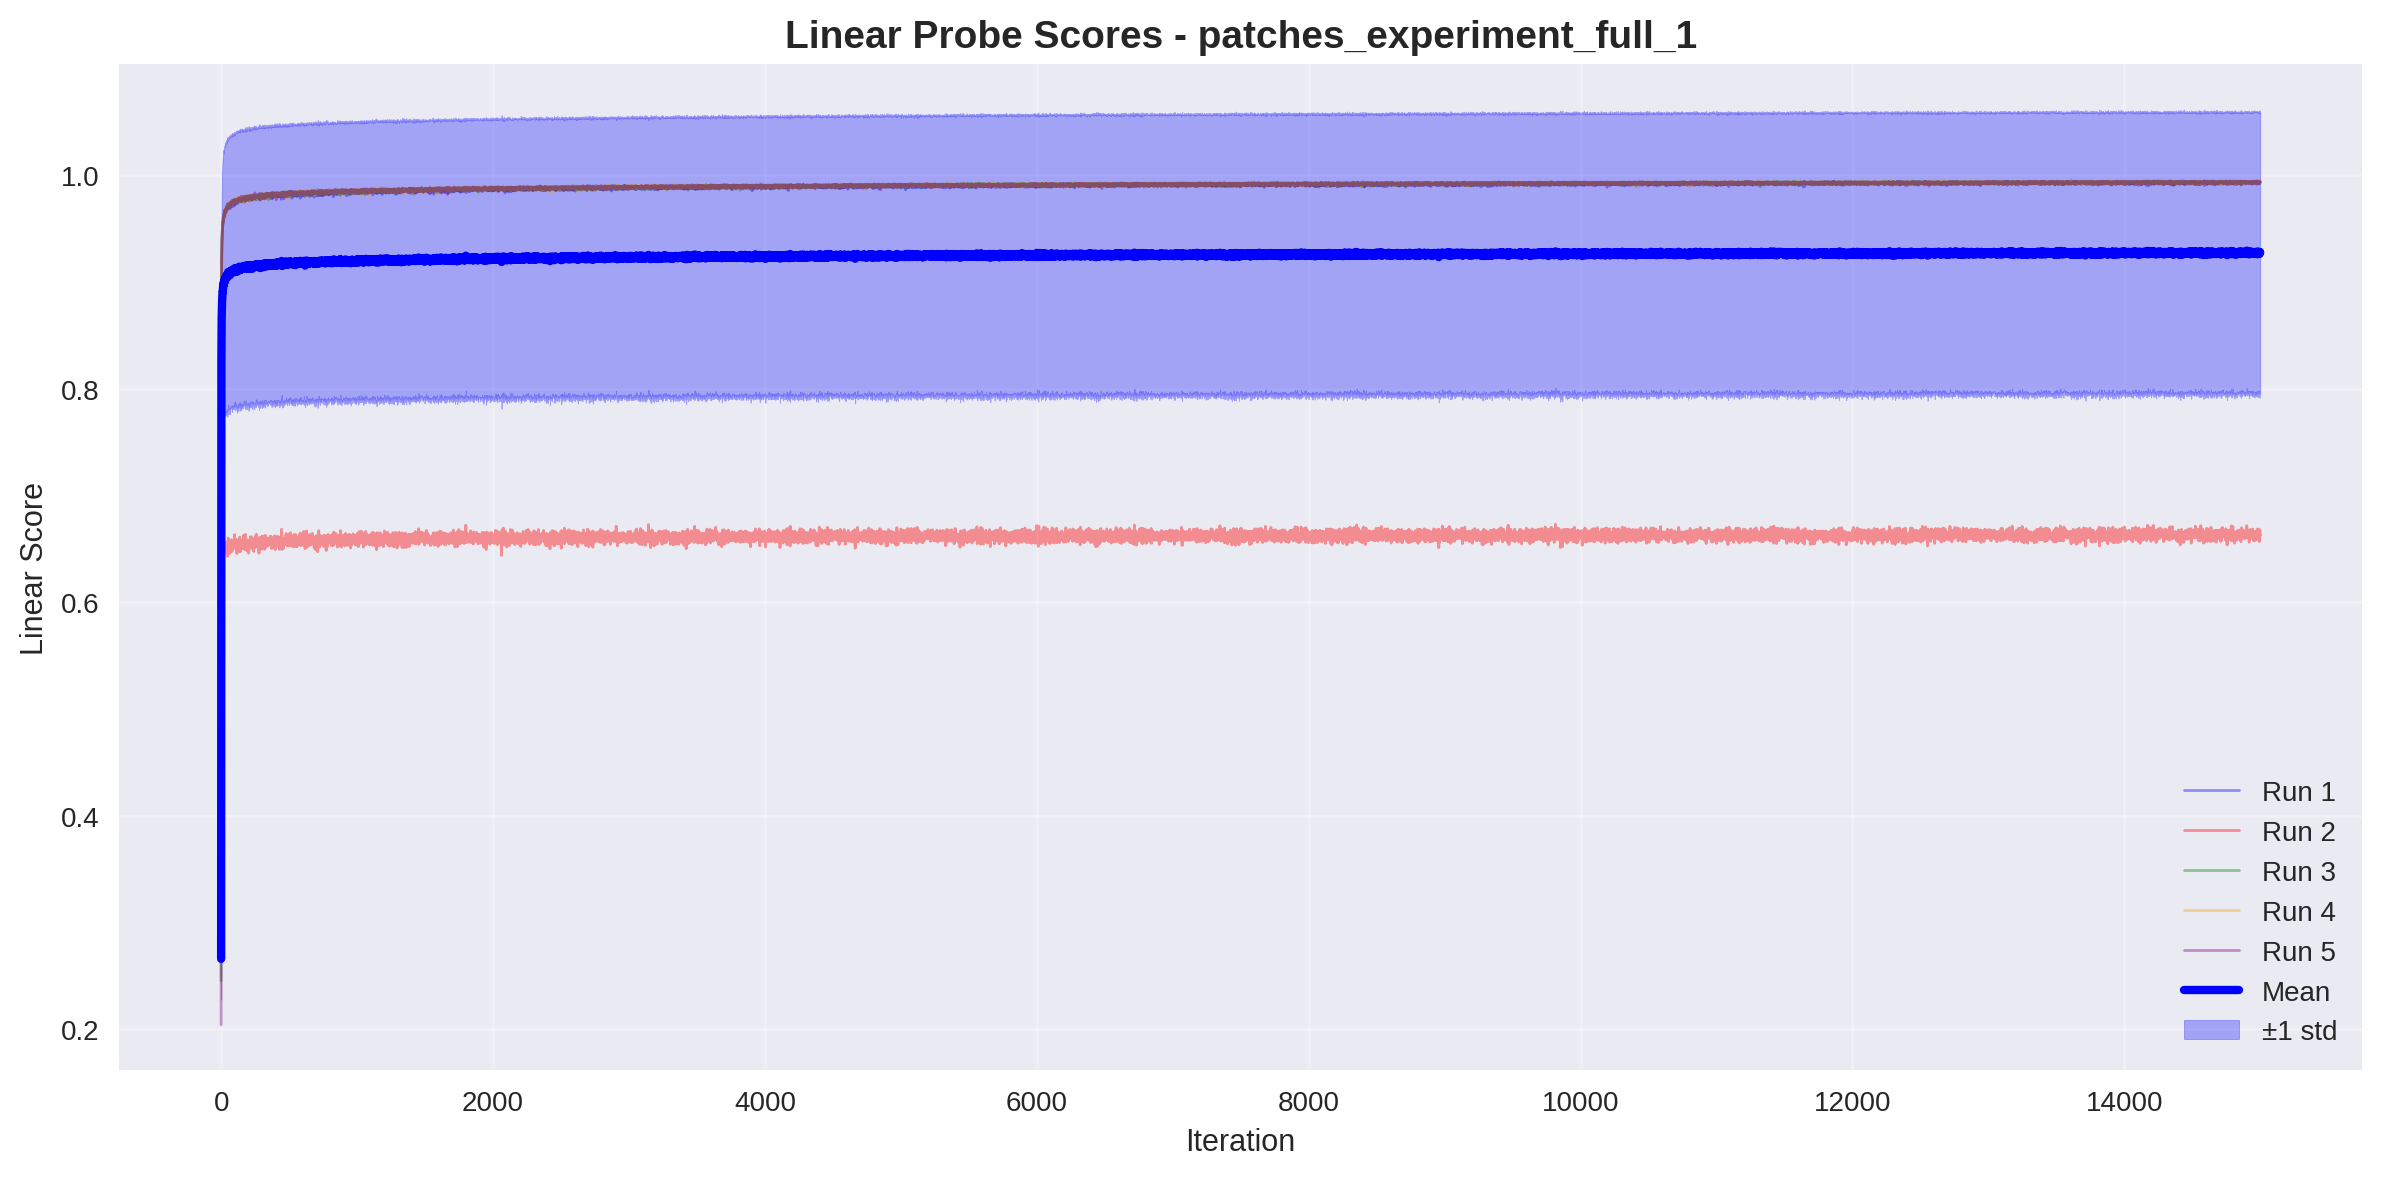

Final linear score (mean ± std): 0.9276 ± 0.1322
Best run final score: 0.9946
Worst run final score: 0.6632


In [11]:
plt.figure(figsize=(12, 6))

# Plot individual runs
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i, scores in enumerate(linear_scores):
    print(scores[-1])
    color = colors[i % len(colors)]
    plt.plot(iterations, scores, alpha=0.4, linewidth=1, color=color, label=f'Run {i+1}' if i < 5 else "")

# Plot mean and std
mean_linear = np.mean(linear_scores, axis=0)
std_linear = np.std(linear_scores, axis=0)
plt.plot(iterations, mean_linear, 'blue', linewidth=3, label='Mean')
plt.fill_between(iterations, mean_linear - std_linear, mean_linear + std_linear, 
                 alpha=0.3, color='blue', label='±1 std')

plt.title(f'Linear Probe Scores - {RUN_NAME}', fontsize=14, fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('Linear Score')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Final linear score (mean ± std): {mean_linear[-1]:.4f} ± {std_linear[-1]:.4f}")
print(f"Best run final score: {np.max(linear_scores[:, -1]):.4f}")
print(f"Worst run final score: {np.min(linear_scores[:, -1]):.4f}")


[0.25140053 0.45722303 0.49004081 ... 0.74328971 0.7496298  0.74127609]
[0.09109151 0.08563616 0.12329844 ... 0.21348615 0.19642006 0.20405312]
[0.1696073  0.4132739  0.45625722 ... 0.43544519 0.43888912 0.43891931]
[0.02373008 0.04321706 0.07039311 ... 0.14477485 0.14077695 0.14916486]
[0.10247076 0.21912272 0.20779109 ... 0.16129494 0.16387703 0.15085836]


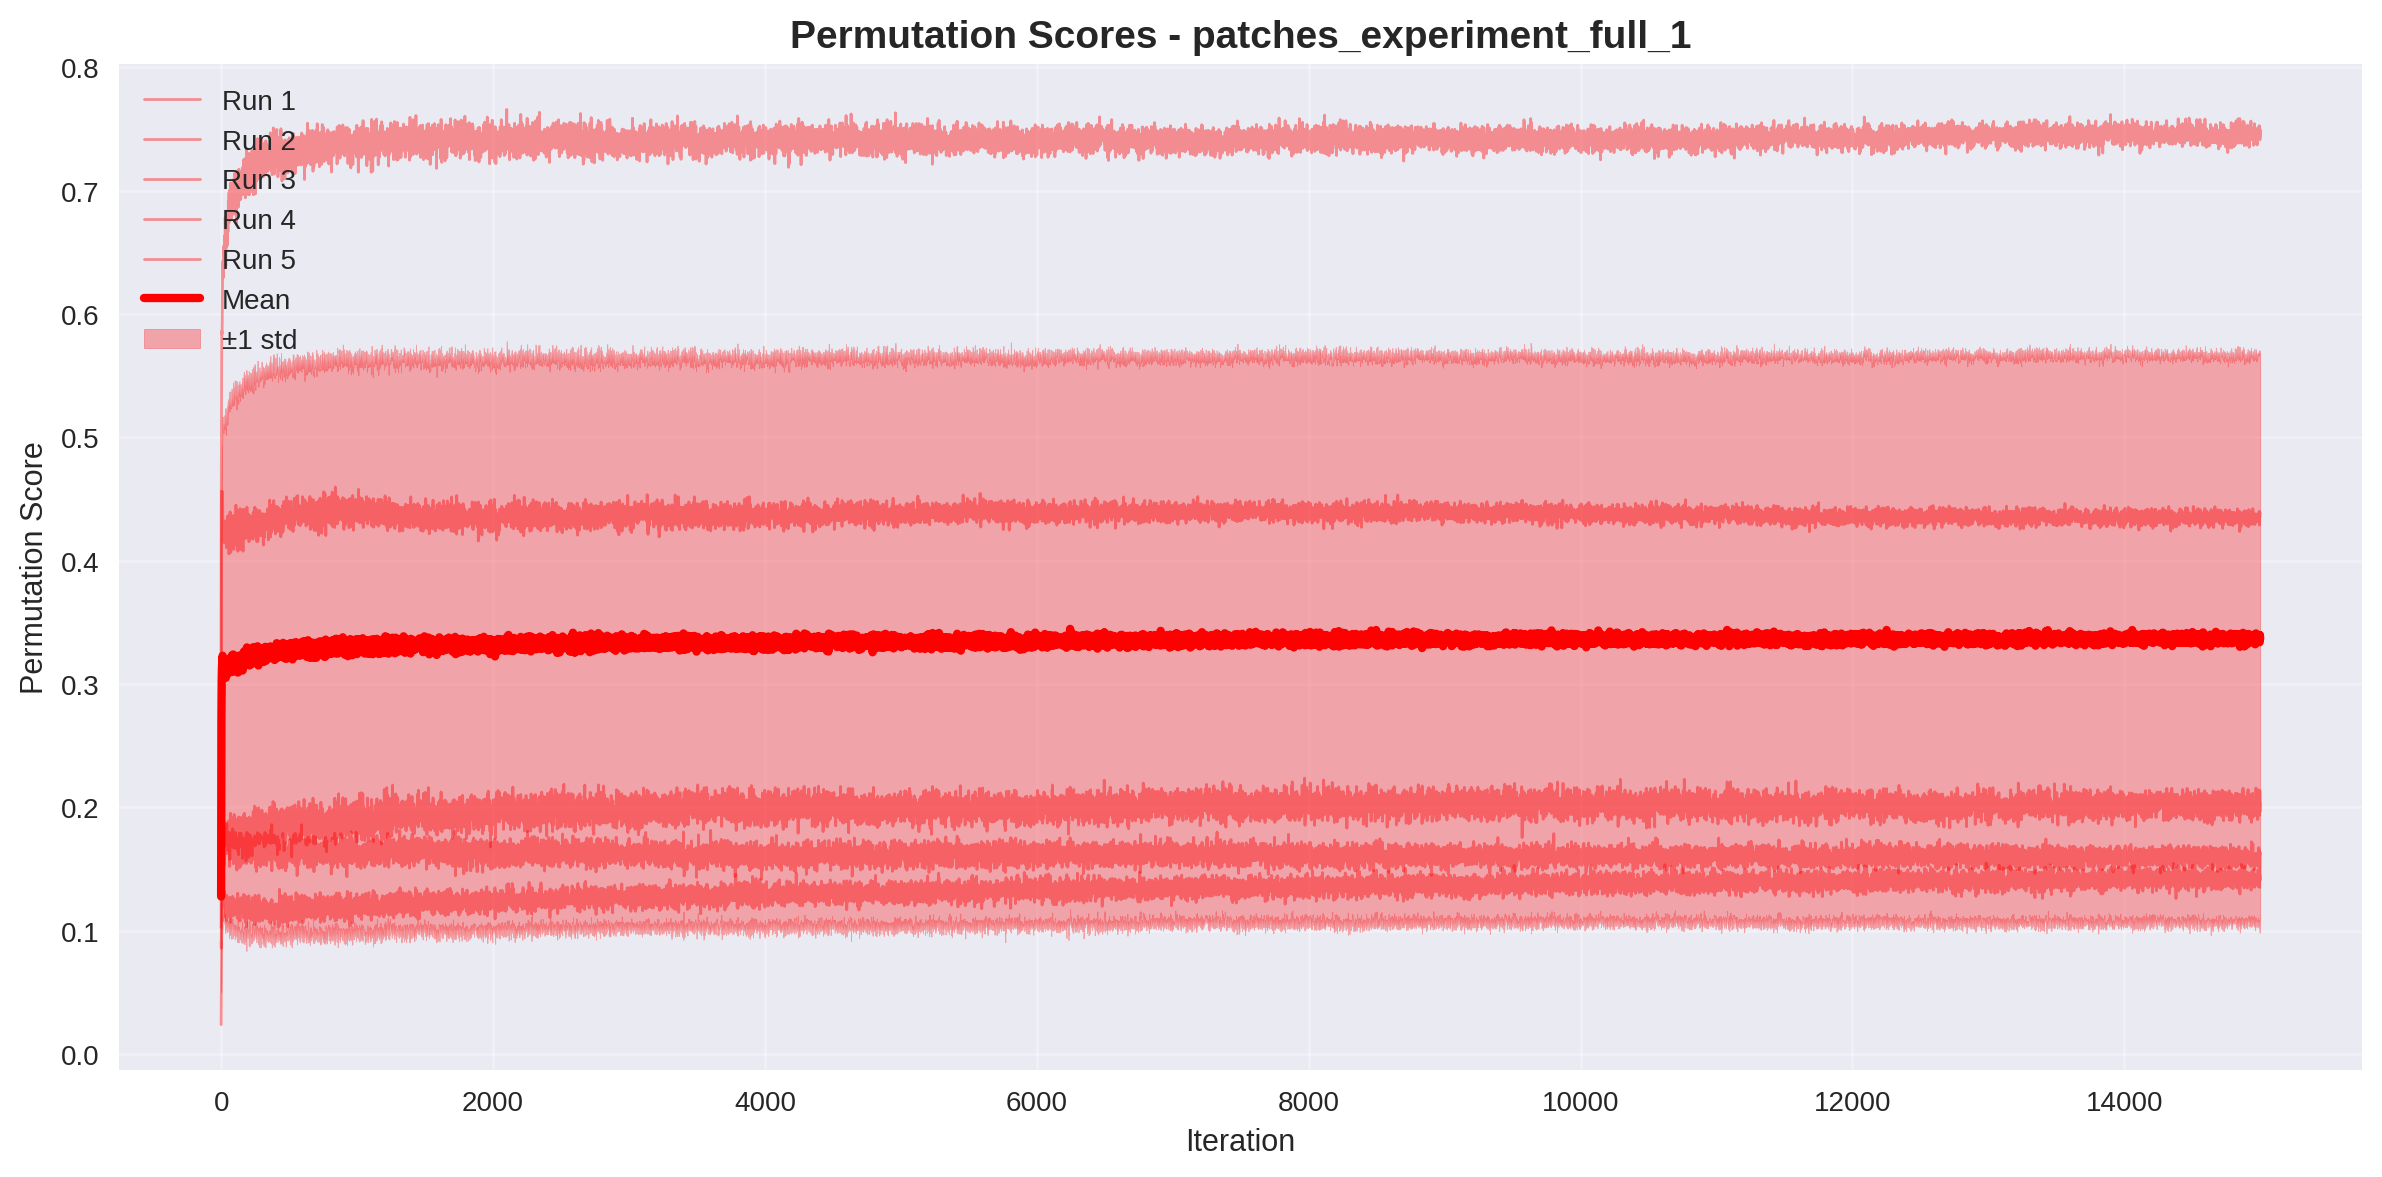

Final permutation score (mean ± std): 0.3369 ± 0.2287
Best run final score: 0.7413
Worst run final score: 0.1492


In [12]:
plt.figure(figsize=(12, 6))

# Plot individual runs
for i, scores in enumerate(perm_scores):
    plt.plot(iterations, scores, alpha=0.4, linewidth=1, color='red', label=f'Run {i+1}' if i < 5 else "")

# Plot mean and std
mean_perm = np.mean(perm_scores, axis=0)
std_perm = np.std(perm_scores, axis=0)
plt.plot(iterations, mean_perm, 'red', linewidth=3, label='Mean')
plt.fill_between(iterations, mean_perm - std_perm, mean_perm + std_perm, 
                 alpha=0.3, color='red', label='±1 std')

plt.title(f'Permutation Scores - {RUN_NAME}', fontsize=14, fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('Permutation Score')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

final_perm = perm_scores[:, -1]
print(f"Final permutation score (mean ± std): {mean_perm[-1]:.4f} ± {std_perm[-1]:.4f}")
print(f"Best run final score: {np.max(final_perm):.4f}")
print(f"Worst run final score: {np.min(final_perm):.4f}")


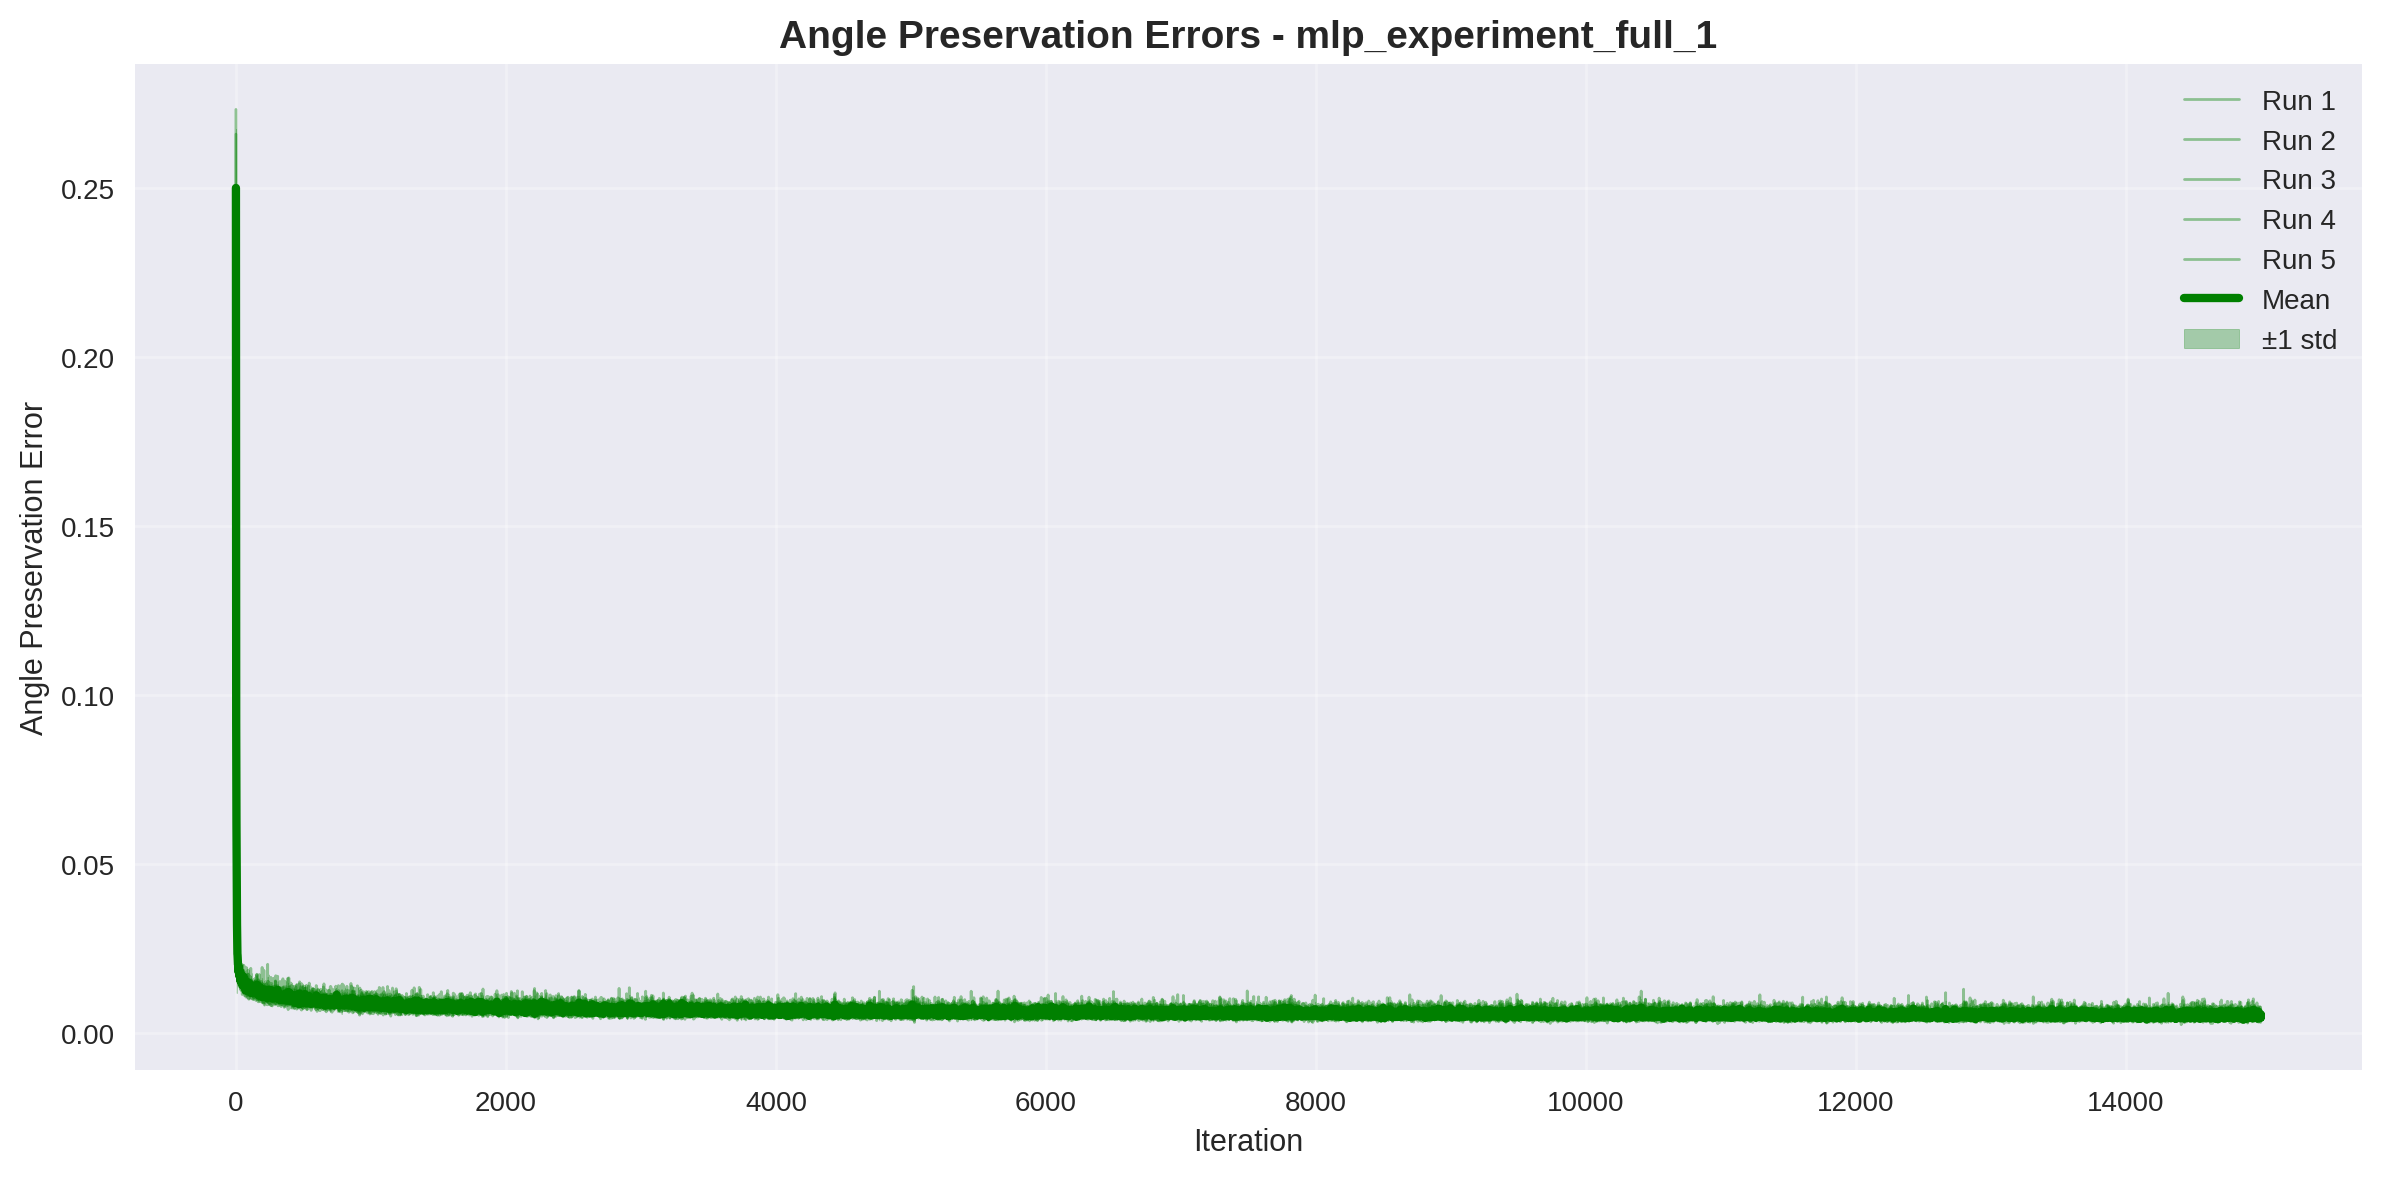

Final angle error (mean ± std): 0.0055 ± 0.0008
Best run final error: 0.0042
Worst run final error: 0.0062


In [29]:
plt.figure(figsize=(12, 6))

# Plot individual runs
for i, errors in enumerate(angle_errors):
    plt.plot(iterations, errors, alpha=0.4, linewidth=1, color='green', label=f'Run {i+1}' if i < 5 else "")

# Plot mean and std
mean_angle = np.mean(angle_errors, axis=0)
std_angle = np.std(angle_errors, axis=0)
plt.plot(iterations, mean_angle, 'green', linewidth=3, label='Mean')
plt.fill_between(iterations, mean_angle - std_angle, mean_angle + std_angle, 
                 alpha=0.3, color='green', label='±1 std')

plt.title(f'Angle Preservation Errors - {RUN_NAME}', fontsize=14, fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('Angle Preservation Error')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

final_angle = angle_errors[:, -1]
print(f"Final angle error (mean ± std): {mean_angle[-1]:.4f} ± {std_angle[-1]:.4f}")
print(f"Best run final error: {np.min(final_angle):.4f}")  # Lower is better
print(f"Worst run final error: {np.max(final_angle):.4f}")


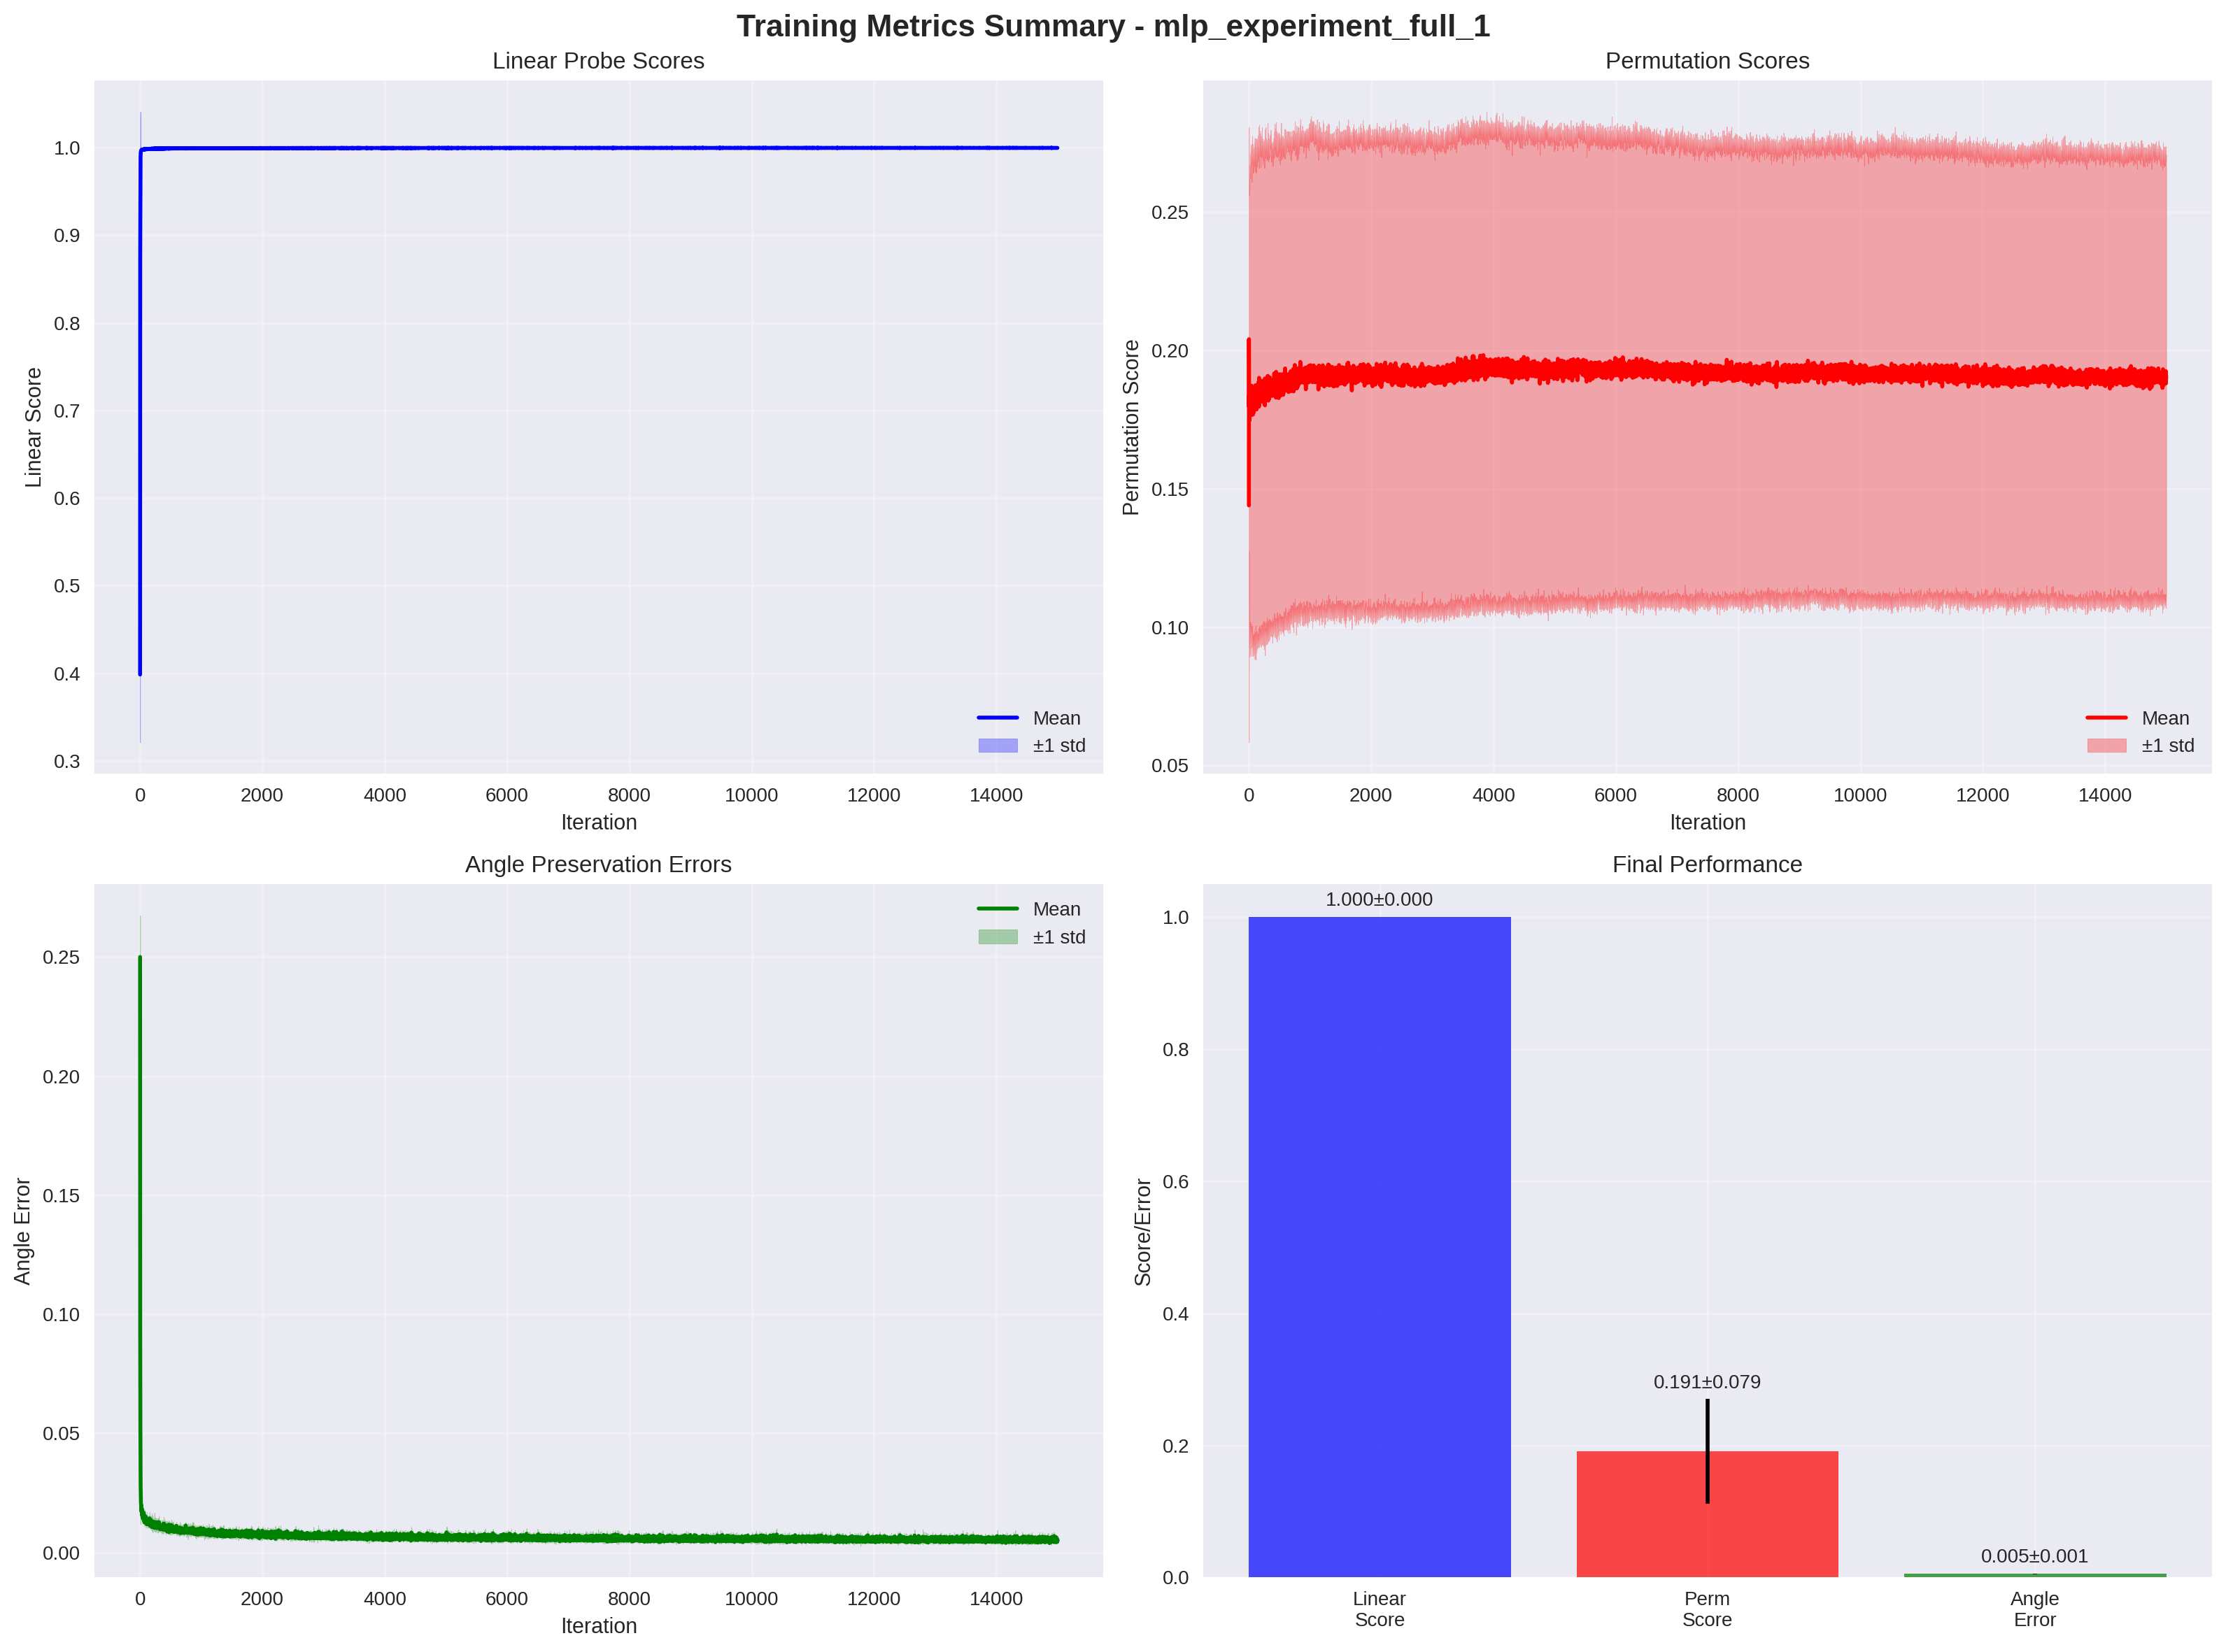

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(f'Training Metrics Summary - {RUN_NAME}', fontsize=16, fontweight='bold')

# Plot 1: Linear Scores
ax1 = axes[0, 0]
ax1.plot(iterations, mean_linear, 'blue', linewidth=2, label='Mean')
ax1.fill_between(iterations, mean_linear - std_linear, mean_linear + std_linear, 
                alpha=0.3, color='blue', label='±1 std')
ax1.set_title('Linear Probe Scores')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Linear Score')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Permutation Scores
ax2 = axes[0, 1]
ax2.plot(iterations, mean_perm, 'red', linewidth=2, label='Mean')
ax2.fill_between(iterations, mean_perm - std_perm, mean_perm + std_perm, 
                alpha=0.3, color='red', label='±1 std')
ax2.set_title('Permutation Scores')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Permutation Score')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Angle Preservation Errors
ax3 = axes[1, 0]
ax3.plot(iterations, mean_angle, 'green', linewidth=2, label='Mean')
ax3.fill_between(iterations, mean_angle - std_angle, mean_angle + std_angle, 
                alpha=0.3, color='green', label='±1 std')
ax3.set_title('Angle Preservation Errors')
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Angle Error')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Final Performance Bar Chart
ax4 = axes[1, 1]
metrics = ['Linear\nScore', 'Perm\nScore', 'Angle\nError']
final_means = [mean_linear[-1], mean_perm[-1], mean_angle[-1]]
final_stds = [std_linear[-1], std_perm[-1], std_angle[-1]]
colors = ['blue', 'red', 'green']

bars = ax4.bar(metrics, final_means, yerr=final_stds, capsize=5, 
               color=colors, alpha=0.7, error_kw={'linewidth': 2})
ax4.set_title('Final Performance')
ax4.set_ylabel('Score/Error')
ax4.grid(True, alpha=0.3)

# Add value labels on bars
for bar, mean, std in zip(bars, final_means, final_stds):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + std + 0.01,
             f'{mean:.3f}±{std:.3f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [34]:
# Summary table
config = results['experiment_config']

print("=" * 60)
print(f"PATCHES SIMCLR EXPERIMENT SUMMARY: {RUN_NAME}")
print("=" * 60)
print(f"Configuration:")
print(f"  • Runs: {len(results['runs'])}")
print(f"  • Batch size: {config['batch_size']}")
print(f"  • Iterations: {config['iterations']}")
print(f"  • Temperature: {config['tau']}")

print(f"\nFinal Performance (Mean ± Std):")
print(f"  • Linear Score: {mean_linear[-1]:.4f} ± {std_linear[-1]:.4f}")
print(f"  • Permutation Score: {mean_perm[-1]:.4f} ± {std_perm[-1]:.4f}")
print(f"  • Angle Error: {mean_angle[-1]:.4f} ± {std_angle[-1]:.4f}")

print(f"\nCoefficient of Variation (Stability):")
cv_linear = std_linear[-1] / mean_linear[-1] * 100
cv_perm = std_perm[-1] / mean_perm[-1] * 100
cv_angle = std_angle[-1] / mean_angle[-1] * 100
print(f"  • Linear Score CV: {cv_linear:.2f}%")
print(f"  • Permutation Score CV: {cv_perm:.2f}%")
print(f"  • Angle Error CV: {cv_angle:.2f}%")

print("=" * 60)


PATCHES SIMCLR EXPERIMENT SUMMARY: mlp_experiment_full_1
Configuration:
  • Runs: 5
  • Batch size: 6144
  • Iterations: 300000
  • Temperature: 0.3

Final Performance (Mean ± Std):
  • Linear Score: 0.9998 ± 0.0000
  • Permutation Score: 0.1910 ± 0.0794
  • Angle Error: 0.0055 ± 0.0008

Coefficient of Variation (Stability):
  • Linear Score CV: 0.00%
  • Permutation Score CV: 41.55%
  • Angle Error CV: 13.84%
